# Problem 1: Linear Regression

## Problem Statement:
You are hired by a company Gem Stones co ltd, which is a cubic zirconia manufacturer. You are provided with the dataset containing the prices and other attributes of almost 27,000 cubic zirconia (which is an inexpensive diamond alternative with many of the same qualities as a diamond). The company is earning different profits on different prize slots. You have to help the company in predicting the price for the stone on the bases of the details given in the dataset so it can distinguish between higher profitable stones and lower profitable stones so as to have better profit share. Also, provide them with the best 5 attributes that are most important.

## Data Dictionary:
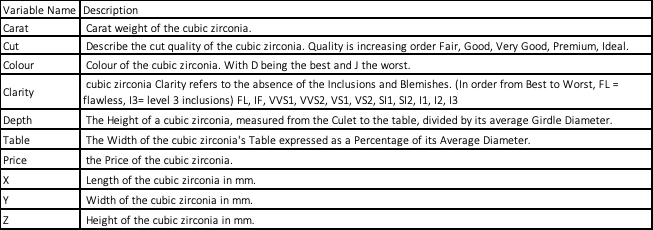


In [1]:
# Numerical libraries
import numpy as np   

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

# Importing the linear regression in stats model
import statsmodels.formula.api as smf

# To handle data in form of rows and columns 
import pandas as pd    

# Importing ploting libraries
import matplotlib.pyplot as plt 

# Importing seaborn for statistical plots
import seaborn as sns

# Importing numpy for list and series operations
import numpy as np

# To split the data into train test and split
from sklearn.model_selection import train_test_split

# VIF package
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Importing math for mathematical functions
import math

# To enable plotting graphs in Jupyter notebook
# %matplotlib inline 

In [2]:
# Importing the dataset form CSV
df_zirconia = pd.read_csv('cubic_zirconia.csv')

In [3]:
# Checking the size of the imported data
df_zirconia.shape

(26967, 11)

In [4]:
# Checking if the data is correctly imported
df_zirconia.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


# Exploratory Data Analysis

In [5]:
# Obtaining the list of the columns in the data set
print('The columns in the data set are:')
for ind, i in enumerate(df_zirconia.columns):
    print('%d. %s'%(ind+1, i))

The columns in the data set are:
1. Unnamed: 0
2. carat
3. cut
4. color
5. clarity
6. depth
7. table
8. x
9. y
10. z
11. price


It is observed that the column 'Unnamed: 0' is an index for the entire data set. So it does not play an important role in the analysis and hence we will drop it.

In [6]:
# Dropping the Unnamed:0 column
df_zirconia.drop(columns='Unnamed: 0', axis=0, inplace=True)

In [7]:
# Checking if the column s dropped out
df_zirconia

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
...,...,...,...,...,...,...,...,...,...,...
26962,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682


In [8]:
# Checking for the info of the raw data
df_zirconia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


-   The columns cut, color and clarity are categorical and are object data type
-	The other columns are all numeric and hence are float and int data types
-	The column depth has 697 blank entries or NaN which needs special attention

In [9]:
# 5 number summary
df_zirconia.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,26967.0,0.798375,0.477745,0.2,0.40,0.70,1.05,4.50
depth,26270.0,61.745147,1.412860,50.8,61.00,61.80,62.50,73.60
table,26967.0,57.456080,2.232068,49.0,56.00,57.00,59.00,79.00
x,26967.0,5.729854,1.128516,0.0,4.71,5.69,6.55,10.23
y,26967.0,5.733569,1.166058,0.0,4.71,5.71,6.54,58.90
z,26967.0,3.538057,0.720624,0.0,2.90,3.52,4.04,31.80
price,26967.0,3939.518115,4024.864666,326.0,945.00,2375.00,5360.00,18818.00


In [10]:
# Finding the skewness of the raw data
df_zirconia.skew()

carat    1.116481
depth   -0.028618
table    0.765758
x        0.387986
y        3.850189
z        2.568257
price    1.618550
dtype: float64

In [11]:
# Summary for the categorical variables
df_zirconia.describe(include=object).T

,count,unique,top,freq
cut,26967,5,Ideal,10816
color,26967,7,G,5661
clarity,26967,8,SI1,6571


In [12]:
# Checking for duplicates
df_zirconia[df_zirconia.duplicated()]

,carat,cut,color,clarity,depth,table,x,y,z,price
4756,0.35,Premium,J,VS1,62.4,58.0,5.67,5.64,3.53,949
6215,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.00,2130
8144,0.33,Ideal,G,VS1,62.1,55.0,4.46,4.43,2.76,854
8919,1.52,Good,E,I1,57.3,58.0,7.53,7.42,4.28,3105
9818,0.35,Ideal,F,VS2,61.4,54.0,4.58,4.54,2.80,906
10473,0.79,Ideal,G,SI1,62.3,57.0,5.90,5.85,3.66,2898
10500,1.00,Premium,F,VVS2,60.6,54.0,6.56,6.52,3.96,8924
12894,1.21,Premium,D,SI2,62.5,57.0,6.79,6.71,4.22,6505
13547,0.43,Ideal,G,VS1,61.9,55.0,4.84,4.86,3.00,943
13783,0.79,Ideal,G,SI1,62.3,57.0,5.90,5.85,3.66,2898


- The x, y and z columns have 0 values. Since x, y and z are length, width and height of the gem respectively they cannot be 0mm. This too needs special attention.
- Columns depth, table and x are very close to a normal distribution
- Columns carat, y, z and price are right skewed
- There are 34 rows that contain duplicate data

------

### Univariate Analysis

In [13]:
# Lets make a list for continuous and categorical variables. This will make it easy for analysis
cont = ['carat', 'depth', 'table', 'x', 'y', 'z', 'price']
cat = ['cut', 'color', 'clarity']

In [14]:
# User defined function to get upper and lower whisker values for each column
def remove_outlier(col):
    col = col.dropna()
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

<AxesSubplot:>

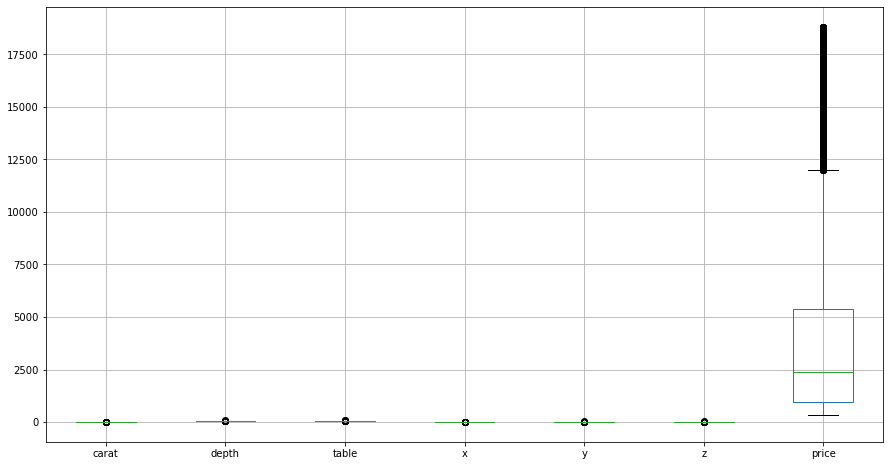

In [15]:
# Plotting the box plot for the data
plt.figure(figsize=(15,8))
df_zirconia.boxplot()

carat


/Users/nihalt/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/nihalt/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/nihalt/opt/anaconda3/lib/python3.8/site-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


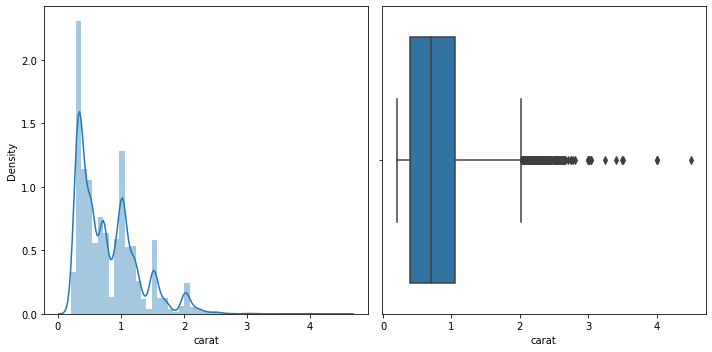

carat is Positive or Right skewed.
The number of outliers in carat is 662

---------------------------------------------------------------------------------------
depth


/Users/nihalt/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/nihalt/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/nihalt/opt/anaconda3/lib/python3.8/site-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


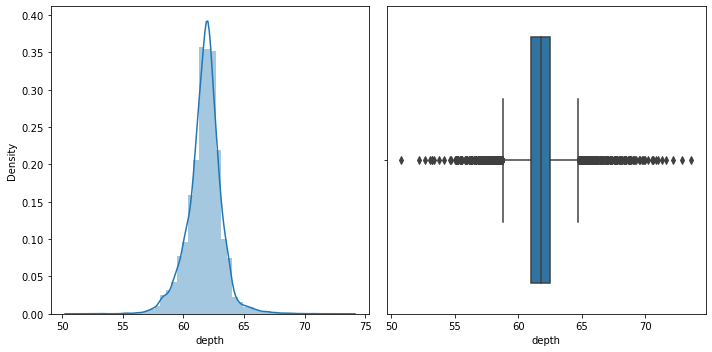

depth is Negative or Left skewed.
The number of outliers in depth is 1225

---------------------------------------------------------------------------------------
table


/Users/nihalt/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/nihalt/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/nihalt/opt/anaconda3/lib/python3.8/site-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


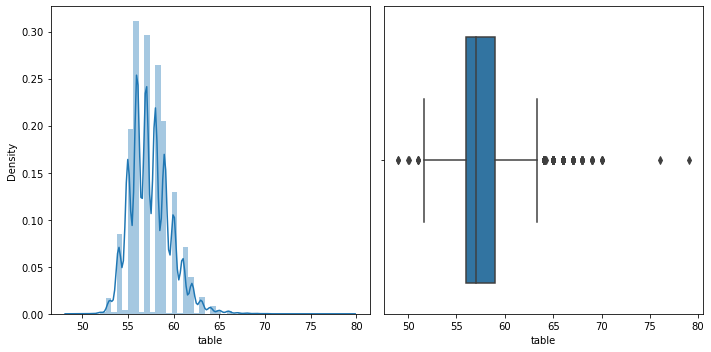

table is Positive or Right skewed.
The number of outliers in table is 318

---------------------------------------------------------------------------------------
x


/Users/nihalt/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/nihalt/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/nihalt/opt/anaconda3/lib/python3.8/site-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


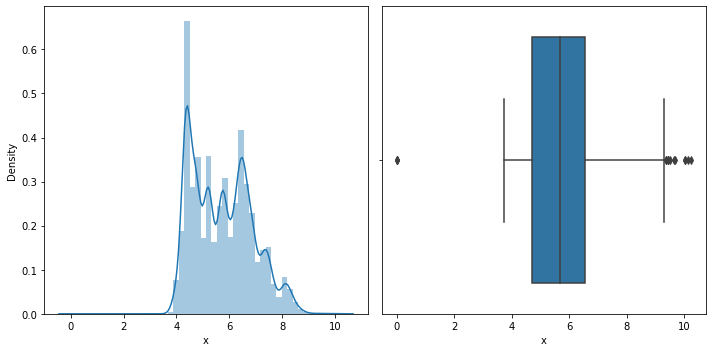

x is Positive or Right skewed.
The number of outliers in x is 15

---------------------------------------------------------------------------------------
y


/Users/nihalt/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/nihalt/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/nihalt/opt/anaconda3/lib/python3.8/site-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


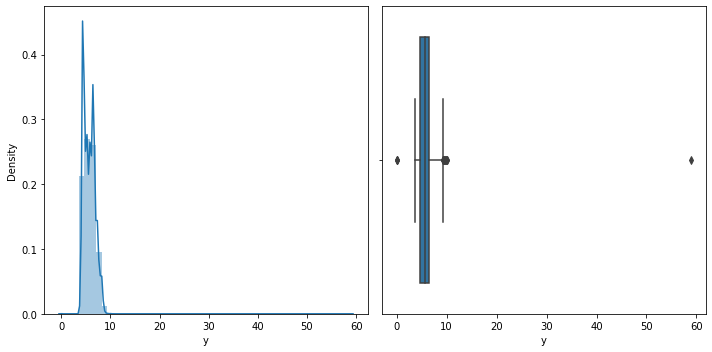

y is Positive or Right skewed.
The number of outliers in y is 15

---------------------------------------------------------------------------------------
z


/Users/nihalt/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/nihalt/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/nihalt/opt/anaconda3/lib/python3.8/site-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


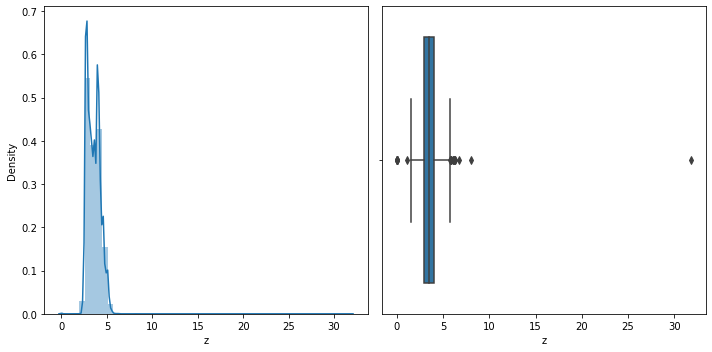

z is Positive or Right skewed.
The number of outliers in z is 23

---------------------------------------------------------------------------------------
price


/Users/nihalt/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/nihalt/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/nihalt/opt/anaconda3/lib/python3.8/site-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


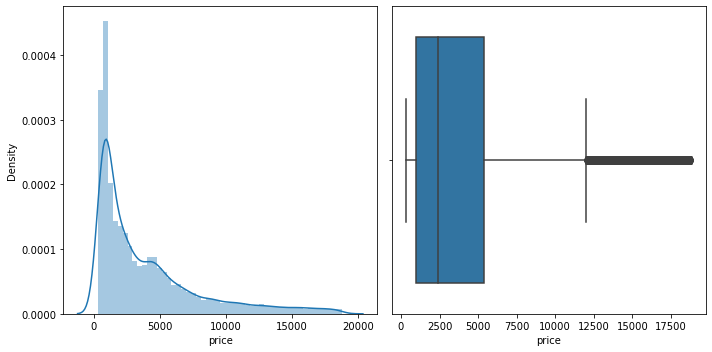

price is Positive or Right skewed.
The number of outliers in price is 1779

---------------------------------------------------------------------------------------


In [16]:
# Univariate analysis that plots the distribution plot, barplot, skewness and the number of outliers
data = df_zirconia[cont].copy()
for i in data:
    print('\033[1m'+i+'\033[1m')
    fig, axes = plt.subplots(ncols=2)
    fig.set_size_inches(10,5)
    sns.distplot(data[i] , ax=axes[:][0], label=i)
    sns.boxplot(data[i] , orient = "v" , ax=axes[:][1])
    plt.tight_layout()
    plt.show()
    skew = data[i].skew()
    if(skew > 0):
        print('%s is Positive or Right skewed.' %(i))
    elif(skew < 0):
        print('%s is Negative or Left skewed.' %(i))
    else:
        print('%s is not skewed.' %(i))
    lratio,uratio=remove_outlier(data[i])
    print('The number of outliers in %s is %d\n'% (i,((data[i]>uratio) | (data[i]<lratio)).sum()))
    print('---------------------------------------------------------------------------------------')

- All the variables, except depth, are multi-modal
- There are considerable number of outliers in each of the variables except

**The price variable is the target variable**

### Bivariate Analysis

carat vs price 


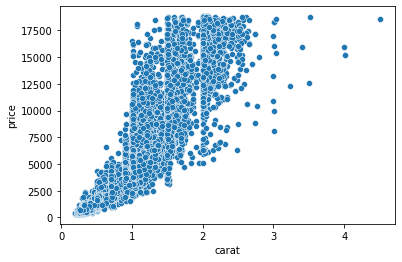

The correlation between the 2 variables are:  0.9224161094805412
---------------------------------------------------------------------------------------
depth vs price 


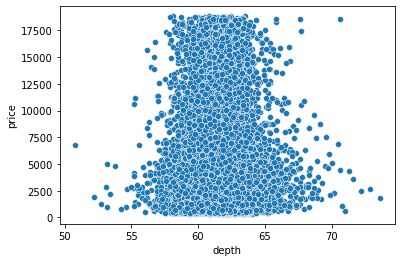

The correlation between the 2 variables are:  -0.0025686163299551076
---------------------------------------------------------------------------------------
table vs price 


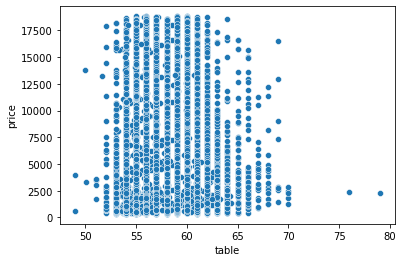

The correlation between the 2 variables are:  0.12694223324168127
---------------------------------------------------------------------------------------
x vs price 


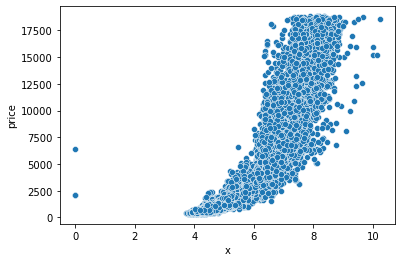

The correlation between the 2 variables are:  0.8862471788154085
---------------------------------------------------------------------------------------
y vs price 


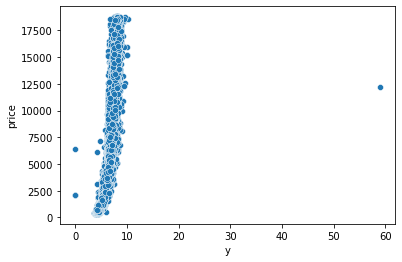

The correlation between the 2 variables are:  0.856242540905528
---------------------------------------------------------------------------------------
z vs price 


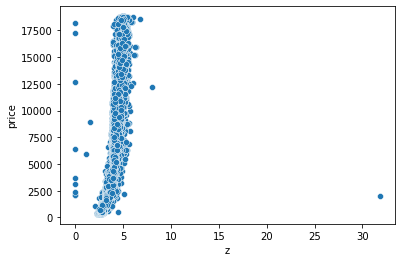

The correlation between the 2 variables are:  0.8505361306239169
---------------------------------------------------------------------------------------


In [17]:
# Plotting the cotinuous variables against the target variable (price)
for i in cont:
    if i != 'price':
        print('\033[1m'+i+' vs '+'price \033[1m')
        sns.scatterplot(data=df_zirconia, x=i, y='price')
        plt.show()
        print('The correlation between the 2 variables are: ',np.corrcoef(df_zirconia[i].dropna(),df_zirconia['price'][~df_zirconia[i].isna()])[0,1])
        print('---------------------------------------------------------------------------------------')

- All the variable have a good correlation with the target variable and prove to be important predictors.
- However, the depth and table form a cloud like plot which proves to be a weak predictor.



cut

The number of unique entries in the column cut : 5

The entry with the highest frequency in cut : Ideal



/Users/nihalt/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


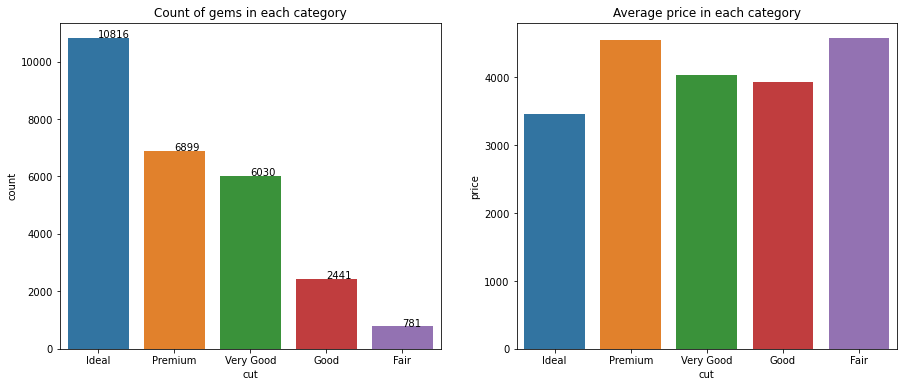

Percentage share:

Ideal        40.108280
Premium      25.583120
Very Good    22.360663
Good          9.051804
Fair          2.896132
Name: cut, dtype: float64
---------------------------------------------------------------------------------------


color

The number of unique entries in the column color : 7

The entry with the highest frequency in color : G



/Users/nihalt/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


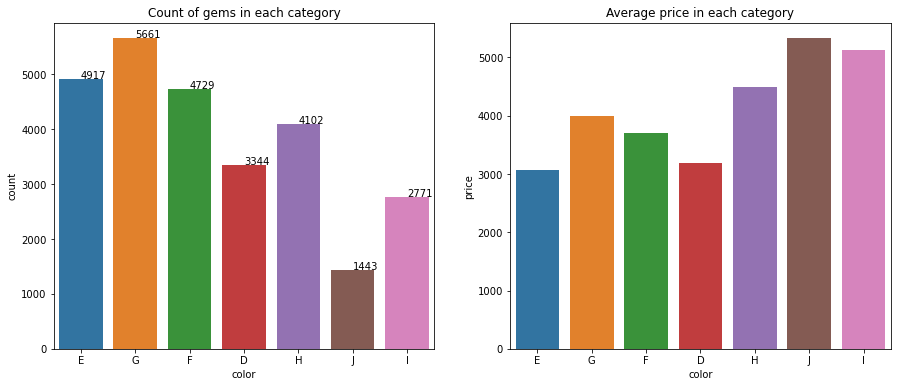

Percentage share:

G    20.992324
E    18.233396
F    17.536248
H    15.211184
D    12.400341
I    10.275522
J     5.350985
Name: color, dtype: float64
---------------------------------------------------------------------------------------


clarity

The number of unique entries in the column clarity : 8

The entry with the highest frequency in clarity : SI1



/Users/nihalt/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


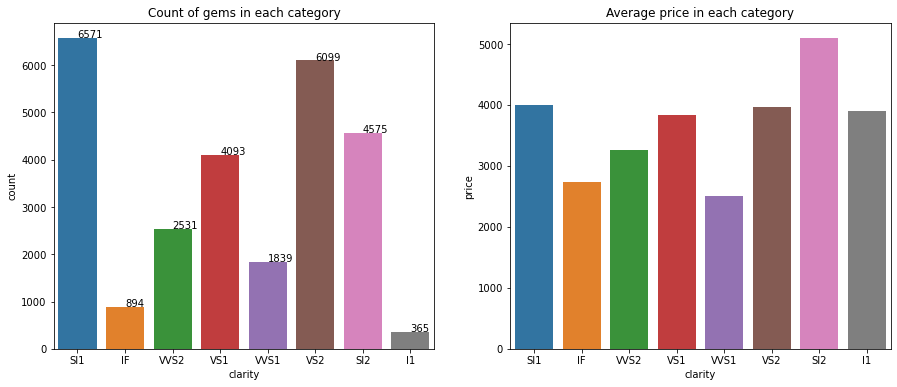

Percentage share:

SI1     24.366819
VS2     22.616531
SI2     16.965180
VS1     15.177810
VVS2     9.385545
VVS1     6.819446
IF       3.315163
I1       1.353506
Name: clarity, dtype: float64
---------------------------------------------------------------------------------------


In [18]:
# Plotting the categorical variables against the target variable (price)
data = df_zirconia[cat].copy()
for j in cat:
    print('\n\n\033[1m'+j+' vs price\033[0m\n')
    print('The number of unique entries in the column %s : %d\n'%(j, data[j].nunique()))
    print('The entry with the highest frequency in %s : %s\n'%(j, data[j].mode()[0]))
    fig, axes = plt.subplots(ncols=2)
    fig.set_size_inches(15,6)
    axes[:][0].set_title('Count of gems in each category')
    sns.countplot(data[j], ax=axes[:][0])
    for p in axes[0].patches:
        axes[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+(p.get_width()/2), p.get_height()+10))
    axes[:][1].set_title('Average price in each category')    
    sns.barplot(x=data[j], y=df_zirconia['price'], ax=axes[:][1], ci=None)
    plt.show()
    print('Percentage share:\n')
    print(data[j].value_counts(normalize=True)*100)
    print('---------------------------------------------------------------------------------------')

### Multi-variate Analysis

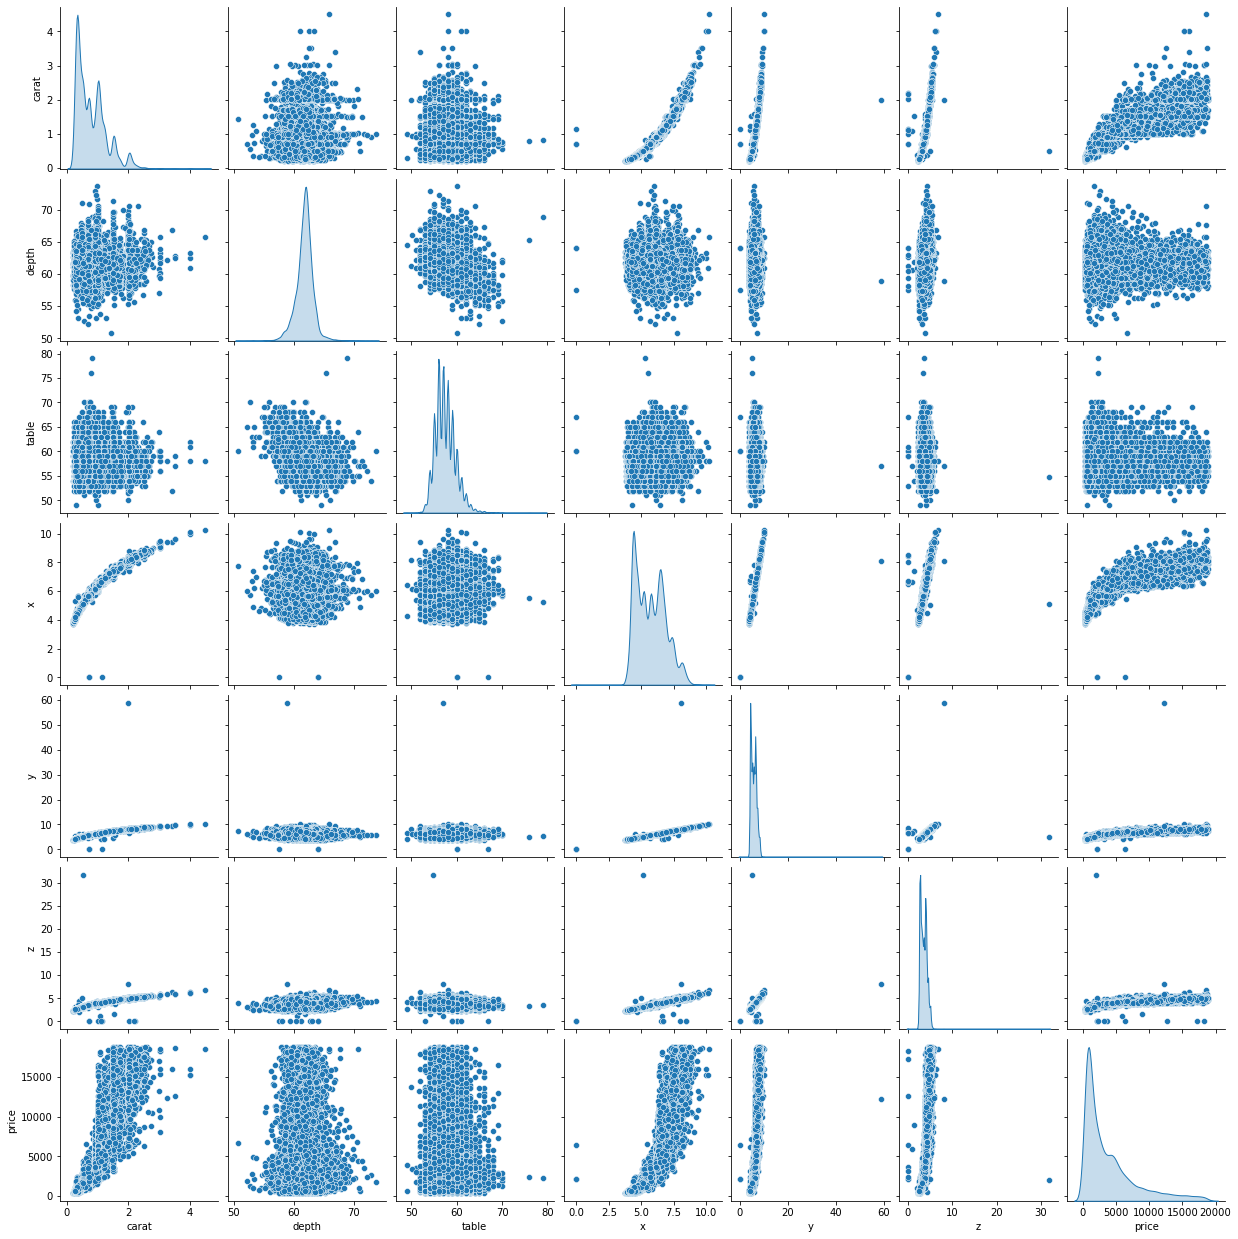

In [19]:
# Lets us first plot a pairplot
sns.pairplot(df_zirconia, diag_kind='kde')

We can observe that there are quite a few pairs that have a high correlation between the independent variables. 

<AxesSubplot:>

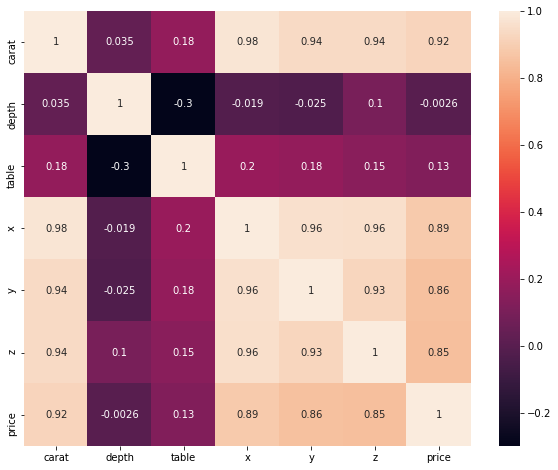

In [20]:
# Heatmap to find the highly correlated variables
plt.figure(figsize=(10,8))
sns.heatmap(data=df_zirconia.corr(), annot=True)

-	The variables x, y and z are highly correlated. We can drop a few columns and check if the model performs better.
-	There are highly correlated pairs with the price and other variable which is a good sign.
-	Apart from x, y and z, there is no much correlation between the independent variables.


--------

# Imputation and outlier treatment

In [21]:
# Making a deep copy of the raw data frame
data = df_zirconia.copy()

### Duplicate entries

In [22]:
# Number of duplicate row entries
data.duplicated().sum()

34

In [23]:
# Removing the duplicated rows
data.drop_duplicates(inplace=True)

In [24]:
# Cross checking the shape of the data
df_zirconia.shape[0]-data.shape[0]

34

### Missing value treatment

In [25]:
# Impute missing values
print('The percetage of missing values in each column:\n{}'.format((data.isnull().sum()/len(data))*100))

The percetage of missing values in each column:
carat      0.000000
cut        0.000000
color      0.000000
clarity    0.000000
depth      2.587903
table      0.000000
x          0.000000
y          0.000000
z          0.000000
price      0.000000
dtype: float64


Since depth column has many outliers we will proceed with mean imputation for all the missing values.

In [26]:
# Mean imputation of missing values in the depth column
data['depth'].fillna(value=df_zirconia['depth'].mean(), inplace=True)

In [27]:
# Checking for missing values in the data set post missing value treatment
data.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

### Zero value treatment

In [28]:
# Since the columns x, y and z has 0 as entry we will first see how many rows have will need to be treated
zero =[] # Initiating an empty list
# Comparing the values in the three columns and appending the value to the list
for i in data.index:
    zero.append(data['x'][i]==0 or data['y'][i]==0 or data['z'][i]==0)
data[zero]

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
6034,2.02,Premium,H,VS2,62.7,53.0,8.02,7.95,0.0,18207
10827,2.20,Premium,H,SI1,61.2,59.0,8.42,8.37,0.0,17265
12498,2.18,Premium,H,SI2,59.4,61.0,8.49,8.45,0.0,12631
12689,1.10,Premium,G,SI2,63.0,59.0,6.50,6.47,0.0,3696
17506,1.14,Fair,G,VS1,57.5,67.0,0.00,0.00,0.0,6381
18194,1.01,Premium,H,I1,58.1,59.0,6.66,6.60,0.0,3167
23758,1.12,Premium,G,I1,60.4,59.0,6.71,6.67,0.0,2383


Since we have 9 rows in the data set that have either x, y or z as 0mm (which is not possible), we will proceed with droping them out. We will proceed dropping them out because the number of rows are very less.

In [29]:
# Droping the rows that have values as 0 in x, y and z
for i in ['x','y','z']:
    data[i].replace(0, np.nan, inplace=True)# Replacing all 0 values with a null value
data.dropna(axis=0, inplace=True) # Dropping the null values 

In [30]:
# Cross checking the number of columns that are dropped
len(df_zirconia)-len(data)

42

### Outlier treatment

In [31]:
# Replacing all outliers with the nearest whisker value
for i in data[cont]: 
    if i != 'price':
        lr,ur=remove_outlier(data[i])
        data[i]=np.where(data[i]>ur,ur,data[i])
        data[i]=np.where(data[i]<lr,lr,data[i])

<AxesSubplot:>

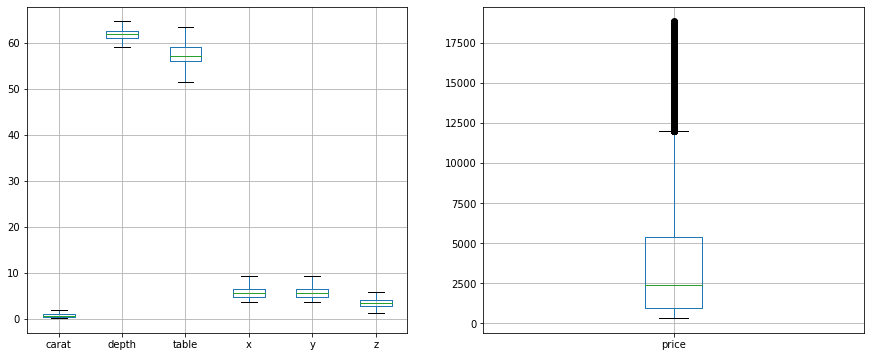

In [32]:
# To verify if the outliers are removed in all the columns except the price variable
fig, axes = plt.subplots(ncols=2)
fig.set_size_inches(15,6)
data.boxplot('price', ax=axes[:][1])
data.drop(columns='price', axis=0).boxplot(ax=axes[:][0])

In [33]:
# 5 number summary to cross check if all the data is intact
data.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,26925.0,0.793119,0.461998,0.20,0.40,0.70,1.05,2.025
depth,26925.0,61.749236,1.218216,59.00,61.10,61.80,62.50,64.600
table,26925.0,57.435023,2.156704,51.50,56.00,57.00,59.00,63.500
x,26925.0,5.729217,1.125500,3.73,4.71,5.69,6.55,9.310
y,26925.0,5.731159,1.117494,3.71,4.71,5.70,6.54,9.285
z,26925.0,3.537625,0.695681,1.19,2.90,3.52,4.04,5.750
price,26925.0,3936.249991,4020.983187,326.00,945.00,2373.00,5353.00,18818.000


In [34]:
# Info of the data set
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26925 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26925 non-null  float64
 1   cut      26925 non-null  object 
 2   color    26925 non-null  object 
 3   clarity  26925 non-null  object 
 4   depth    26925 non-null  float64
 5   table    26925 non-null  float64
 6   x        26925 non-null  float64
 7   y        26925 non-null  float64
 8   z        26925 non-null  float64
 9   price    26925 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.3+ MB


In [35]:
# Checking the shape of the data
data.shape

(26925, 10)

-------

# Encoding

Since the columns cut, color and clarity are all ordinal in data type, we will do label encoding to convert them into numeric values and give each class a value. 0 being the worst and n being the best.

In [36]:
# Cut and the corresponding codes
cut_code = pd.DataFrame({
    "cut_desc":["Fair", "Good", "Very Good", "Premium", "Ideal"],
    "cut_code":np.arange(1,6)
})
cut_code

,cut_desc,cut_code
0,Fair,1
1,Good,2
2,Very Good,3
3,Premium,4
4,Ideal,5


In [37]:
# Color and the corresponding codes
color_code = pd.DataFrame({
    "color_desc":["J", "I", "H", "G", "F", "E", "D"],
    "color_code":np.arange(1,8)
})
color_code

,color_desc,color_code
0,J,1
1,I,2
2,H,3
3,G,4
4,F,5
5,E,6
6,D,7


In [38]:
# Color and the corresponding codes
clarity_code = pd.DataFrame({
    "clarity_desc":["I3",  "I2",  "I1",  "SI2",  "SI1",  "VS2",  "VS1",  "VVS2",  "VVS1",  "IF", "FL"],
    "clarity_code":np.arange(1,12)
})
clarity_code

,clarity_desc,clarity_code
0,I3,1
1,I2,2
2,I1,3
3,SI2,4
4,SI1,5
5,VS2,6
6,VS1,7
7,VVS2,8
8,VVS1,9
9,IF,10


In [39]:
# Merging the above tables to the data to code the categorical variables as pe our numbering 
data = pd.merge(data, cut_code, left_on='cut', right_on='cut_desc').drop('cut_desc', axis=1)
data = pd.merge(data, color_code, left_on='color', right_on='color_desc').drop('color_desc', axis=1)
data = pd.merge(data, clarity_code, left_on='clarity', right_on='clarity_desc').drop('clarity_desc', axis=1)
data

,carat,cut,color,clarity,depth,table,x,y,z,price,cut_code,color_code,clarity_code
0,0.30,Ideal,E,SI1,62.100000,58.0,4.27,4.29,2.66,499,5,6,5
1,0.59,Ideal,E,SI1,62.000000,55.0,5.37,5.40,3.34,1664,5,6,5
2,0.54,Ideal,E,SI1,62.100000,56.0,5.24,5.19,3.24,1637,5,6,5
3,0.51,Ideal,E,SI1,62.400000,55.0,5.14,5.09,3.19,1443,5,6,5
4,0.43,Ideal,E,SI1,61.745147,56.0,4.82,4.79,3.01,975,5,6,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26920,0.90,Fair,I,I1,64.600000,60.0,5.96,5.88,3.98,1786,1,2,3
26921,0.73,Fair,I,I1,64.600000,58.0,5.63,5.50,3.68,1175,1,2,3
26922,1.00,Fair,I,I1,64.600000,57.0,6.15,6.03,4.09,1997,1,2,3
26923,1.20,Fair,I,I1,64.600000,55.0,6.65,6.59,4.31,2376,1,2,3


We will compare the value counts of the descriptiin column and the encoded column. The difference in counts should be 0.

In [40]:
# Value counts for color
data['color'].value_counts() - data['color_code'].value_counts()

1   NaN
2   NaN
3   NaN
4   NaN
5   NaN
6   NaN
7   NaN
D   NaN
E   NaN
F   NaN
G   NaN
H   NaN
I   NaN
J   NaN
dtype: float64

In [41]:
# Value counts for cut
data['cut'].value_counts() - data['cut_code'].value_counts()

1           NaN
2           NaN
3           NaN
4           NaN
5           NaN
Fair        NaN
Good        NaN
Ideal       NaN
Premium     NaN
Very Good   NaN
dtype: float64

In [42]:
# Value counts for clarity
data['clarity'].value_counts() - data['clarity_code'].value_counts()

3      NaN
4      NaN
5      NaN
6      NaN
7      NaN
8      NaN
9      NaN
10     NaN
I1     NaN
IF     NaN
SI1    NaN
SI2    NaN
VS1    NaN
VS2    NaN
VVS1   NaN
VVS2   NaN
dtype: float64

In [43]:
# Dropping the description columns and storing the data in a new data frame
df = data.drop(["cut", "color", "clarity"], axis=1)
df

,carat,depth,table,x,y,z,price,cut_code,color_code,clarity_code
0,0.30,62.100000,58.0,4.27,4.29,2.66,499,5,6,5
1,0.59,62.000000,55.0,5.37,5.40,3.34,1664,5,6,5
2,0.54,62.100000,56.0,5.24,5.19,3.24,1637,5,6,5
3,0.51,62.400000,55.0,5.14,5.09,3.19,1443,5,6,5
4,0.43,61.745147,56.0,4.82,4.79,3.01,975,5,6,5
...,...,...,...,...,...,...,...,...,...,...
26920,0.90,64.600000,60.0,5.96,5.88,3.98,1786,1,2,3
26921,0.73,64.600000,58.0,5.63,5.50,3.68,1175,1,2,3
26922,1.00,64.600000,57.0,6.15,6.03,4.09,1997,1,2,3
26923,1.20,64.600000,55.0,6.65,6.59,4.31,2376,1,2,3


In [44]:
# Verifying the data types of the columns
df.dtypes

carat           float64
depth           float64
table           float64
x               float64
y               float64
z               float64
price             int64
cut_code          int64
color_code        int64
clarity_code      int64
dtype: object

--------

# Modeling
## Model 1
Standard model with all variables and no regularization

In [45]:
# We will split the data into predictore variables (X) and predicted variables (y)
X = df.drop('price', axis=1)
y = df['price']

In [46]:
# Splitting the data into training and testing sets to perform modeling
X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=1, test_size=0.30)

In [47]:
# We will implement the regression model using stats model as it gives up more control and also gives us a detailed report
data_train = pd.concat([X_train, y_train], axis=1)
data_test = pd.concat([X_test,y_test], axis=1)
data_train.head()

,carat,depth,table,x,y,z,cut_code,color_code,clarity_code,price
5029,1.01,62.3,55.0,6.46,6.45,4.02,5,3,5,5029
12098,1.71,60.5,56.0,7.71,7.73,4.67,5,2,6,11455
20154,0.71,62.4,58.0,5.67,5.70,3.55,3,1,7,2061
4712,0.90,63.2,60.0,6.09,6.12,3.86,2,1,5,2729
2548,0.78,61.1,57.0,5.95,5.97,3.64,5,7,5,3214


In [48]:
# Formula is given in the order of the original data frame
form = 'price~carat+cut_code+color_code+clarity_code+depth+table+x+y+z'

# We will use the ols method to find the line of best fit for the train data
linear_reg1 = smf.ols(formula= form, data = data_train).fit()

# Obtaining the coefficients of the variables and the intercept
linear_reg1.params

Intercept        1386.430438
carat           13811.506266
cut_code          141.775523
color_code        328.880503
clarity_code      477.178343
depth             -12.216172
table             -21.710030
x               -2565.491390
y                1592.704439
z               -1619.004643
dtype: float64

In [49]:
# To obtain the regression report
print(linear_reg1.summary()) 
r_sqrd1 = linear_reg1.rsquared
print("The R-squared valued for the train data is {}".format(r_sqrd1))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                 2.306e+04
Date:                Wed, 20 Jan 2021   Prob (F-statistic):               0.00
Time:                        21:17:44   Log-Likelihood:            -1.5973e+05
No. Observations:               18847   AIC:                         3.195e+05
Df Residuals:                   18837   BIC:                         3.196e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1386.4304   1014.996      1.366   

In [50]:
# Calculating the RMSE on the training data
mse1_train = np.mean((linear_reg1.predict(data_train.drop('price', axis=1))-data_train['price'])**2)
rmse1_train = np.sqrt(mse1_train)
print('The root mean squared value of the model on training data is %f'%rmse1_train)

The root mean squared value of the model on training data is 1159.849864


In [51]:
# Calculating the RMSE in the testing data
mse1_test = np.mean((linear_reg1.predict(data_test.drop('price', axis=1))-data_test['price'])**2)
rmse1_test = np.sqrt(mse1_test)
print('The root mean squared value of the model on testing data is %f'%rmse1_test)

The root mean squared value of the model on testing data is 1150.906593


In [52]:
# Computing the VIF score for each variable
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 
i=0
for column in X.columns:
    print (column ,"--->",  vif[i])
    i = i+1

carat ---> 122.82142483907428
depth ---> 1266.0534160495022
table ---> 870.792818927523
x ---> 10679.18850534223
y ---> 9444.224919077704
z ---> 3351.134118738621
cut_code ---> 17.456889189268328
color_code ---> 8.532910645758758
clarity_code ---> 17.790060344085344


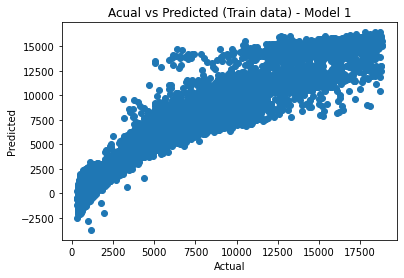

In [53]:
# Actual vs predicted on train
y_train_pred1 = linear_reg1.predict(data_train)
plt.scatter(y_train, y_train_pred1)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Acual vs Predicted (Train data) - Model 1')
plt.show()

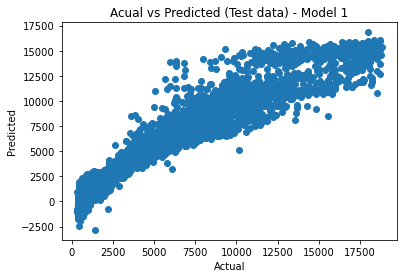

In [54]:
# Actual vs predicted on test
y_test_pred1 = linear_reg1.predict(data_test)
plt.scatter(y_test, y_test_pred1)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Acual vs Predicted (Test data) - Model 1')
plt.show()

-	The p_value for depth is more than 5% showing that the coefficient has no effect on the price.
-	The prob of the model is 0. The model is performing at its best but this model may not be the  best.
-	The RMSE value is very high which means the error is high
-	The coefficients are very large in numbers which means there is a high possibility of the model being overfit. 
-	The VIF’s have very high values which show severe multicollinearity which will make interpretation of the model very hard.

Remedy:
-	We will drop depth to reduce the dimensionality of the data used for analysis.
-	Since the VIF values are extremely high, we will remove a few columns form the data for modelling. From the correlation heatmap we can observe that x, y and z are highly correlated to carat an so these can be removed out by retaining only carat. The table variable also has a high VIF value and hence can be removed out.


## Model 2
We will drop a few variables and check if the model is still performing well. This model is without regularization.

In [55]:
# Dropping the varibales x, y, z, depth and table to reduce the multicolinearity problem and select useful features only
X = df.drop(['price','x','y','z','depth', 'table'], axis=1)
y = df['price']

In [56]:
# Splitting the data into training and testing sets to perform modeling
X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=1, test_size=0.30)

In [57]:
# We will implement the regression model using stats model as it gives up more control and also gives us a detailed report
data_train = pd.concat([X_train, y_train], axis=1)
data_test = pd.concat([X_test,y_test], axis=1)
data_train.head()

,carat,cut_code,color_code,clarity_code,price
5029,1.01,5,3,5,5029
12098,1.71,5,2,6,11455
20154,0.71,3,1,7,2061
4712,0.90,2,1,5,2729
2548,0.78,5,7,5,3214


In [58]:
# Formula is given in the order of the original data frame
form = 'price~carat+cut_code+color_code+clarity_code'

# We will use the ols method to find the line of best fit for the train data
linear_reg2 = smf.ols(formula= form, data = data_train).fit()

# Obtaining the coefficients of the variables and the intercept
linear_reg2.params

Intercept      -8540.301302
carat           9106.500966
cut_code         166.638982
color_code       320.138172
clarity_code     526.985397
dtype: float64

In [59]:
# To obtain the regression report
print(linear_reg2.summary())
r_sqrd2 = linear_reg2.rsquared
print("The R-squared valued for the train data is {}".format(r_sqrd2))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                 4.582e+04
Date:                Wed, 20 Jan 2021   Prob (F-statistic):               0.00
Time:                        21:17:45   Log-Likelihood:            -1.6080e+05
No. Observations:               18847   AIC:                         3.216e+05
Df Residuals:                   18842   BIC:                         3.216e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -8540.3013     63.219   -135.091   

In [60]:
# Calculating the RMSE on the training data
mse2_train = np.mean((linear_reg2.predict(data_train.drop('price', axis=1))-data_train['price'])**2)
rmse2_train = np.sqrt(mse2_train)
print('The root mean squared value of the model on training data is %f'%rmse2_train)

The root mean squared value of the model on training data is 1227.743576


In [61]:
# Calculating the RMSE in the testing data
mse2_test = np.mean((linear_reg2.predict(data_test.drop('price', axis=1))-data_test['price'])**2)
rmse2_test = np.sqrt(mse2_test)
print('The root mean squared value of the model on testing data is %f'%rmse2_test)

The root mean squared value of the model on testing data is 1216.189305


In [62]:
# Computing the VIF score for each variable
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 
i=0
for column in X.columns:
    print (column ,"--->",  vif[i])
    i = i+1

carat ---> 2.9771475046442455
cut_code ---> 11.146091243301237
color_code ---> 5.952711583834655
clarity_code ---> 10.043344198141916


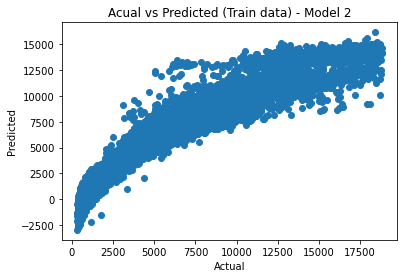

In [63]:
# Actual vs predicted on train
y_train_pred2 = linear_reg2.predict(data_train)
plt.scatter(y_train, y_train_pred2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Acual vs Predicted (Train data) - Model 2')
plt.show()

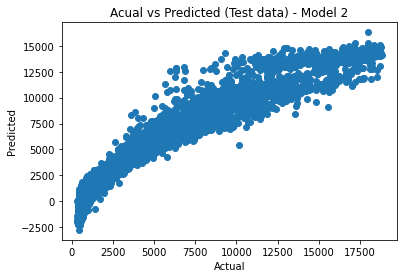

In [64]:
# Actual vs predicted on test
y_test_pred2 = linear_reg2.predict(data_test)
plt.scatter(y_test, y_test_pred2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Acual vs Predicted (Test data) - Model 2')
plt.show()

## Model 3
We will now drop multicolinear variables and use regularization to check if the model performs better.

In [65]:
# Dropping the varibales x, y, z, depth and table to reduce the multicolinearity problem and select useful features only
X = df.drop(['price','x','y','z','depth', 'table'], axis=1)
y = df[['price']]

In [66]:
# Splitting the data into training and testing sets to perform modeling
X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=1, test_size=0.30)

In [67]:
# Regular linear regrssion model
regression_model = LinearRegression()
regression_model.fit(X_train,y_train)

for idx, col_name in enumerate(X_train.columns):
    print("Coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

Coefficient for carat is 9106.500966352276
Coefficient for cut_code is 166.6389824401507
Coefficient for color_code is 320.1381716734438
Coefficient for clarity_code is 526.9853969673861


For alpha = 0.1, the root mean squared value of the model on train data is:1227.7435820192222
For alpha = 0.5, the root mean squared value of the model on train data is:1227.743721688514
For alpha = 1, the root mean squared value of the model on train data is:1227.7441579708345
For alpha = 10, the root mean squared value of the model on train data is:1227.801413783868
For alpha = 20, the root mean squared value of the model on train data is:1227.97342054568
For alpha = 100, the root mean squared value of the model on train data is:1233.1926824694183
For alpha = 200, the root mean squared value of the model on train data is:1248.1080532645904
For alpha = 300, the root mean squared value of the model on train data is:1270.5062438256546
For alpha = 500, the root mean squared value of the model on train data is:1331.1221987116141


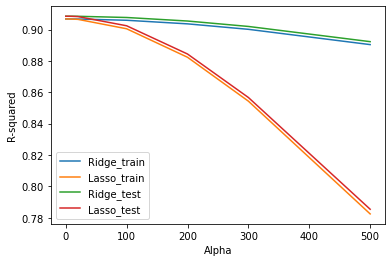

In [68]:
# We compute the R-squared and the RMSE values for differnt values of alpha to pick an appropriate value 
# ridge_train, ridge_test, lasso_train, lasso_test = ([],)*4 # This forms a linked list which is not needed in this case
ridge_train = []
ridge_test = []
lasso_train = []
lasso_test = []
alpha = [0.1, 0.5, 1, 10, 20, 100, 200, 300, 500]
for i in alpha:
    ridge = Ridge(alpha=i)
    ridge.fit(X_train, y_train)
    lasso = Lasso(alpha=i)
    lasso.fit(X_train, y_train)
    ridge_train.append(ridge.score(X_train,y_train))
    ridge_test.append(ridge.score(X_test,y_test))
    lasso_train.append(lasso.score(X_train,y_train))
    lasso_test.append(lasso.score(X_test,y_test))
    mse = np.mean((ridge.predict(X_train)-y_train)**2)
    math.sqrt(mse)
    print("For alpha = {}, the root mean squared value of the model on train data is:{}".format(i,math.sqrt(mse)))
plt.plot(alpha, ridge_train)
plt.plot(alpha, lasso_train)
# plt.show()
plt.plot(alpha, ridge_test)
plt.plot(alpha, lasso_test)
plt.legend(['Ridge_train','Lasso_train', 'Ridge_test',  'Lasso_test'])
plt.xlabel('Alpha')
plt.ylabel('R-squared')
plt.show()


In [69]:
# Ridge model with
ridge = Ridge(alpha=300)
ridge.fit(X_train, y_train)
comparison = pd.DataFrame({
    "Standard Linear Regression": regression_model.coef_[0],
    "Ridge Regularized Regression": ridge.coef_[0]
}, index=['Carat','Cut', 'Color', 'Clarity' ])
comparison.T

,Carat,Cut,Color,Clarity
Standard Linear Regression,9106.500966,166.638982,320.138172,526.985397
Ridge Regularized Regression,8305.138332,140.524598,254.332523,447.151899


In [70]:
r_sqrd3 = ridge.score(X_train, y_train)
print("The R-squared valued for the train data is {}".format(r_sqrd3))

The R-squared valued for the train data is 0.9001632956964782


In [71]:
# Calculating the RMSE on the training data
mse3_train = np.mean((ridge.predict(X_train)-y_train)**2)
rmse3_train = math.sqrt(mse3_train)
print('The root mean squared value of the model on training data is %f'%rmse3_train)

The root mean squared value of the model on training data is 1270.506244


In [72]:
# Calculating the RMSE on the training data
mse3_test = np.mean((ridge.predict(X_test)-y_test)**2)
rmse3_test = math.sqrt(mse3_test)
print('The root mean squared value of the model on training data is %f'%rmse3_test)

The root mean squared value of the model on training data is 1258.705122


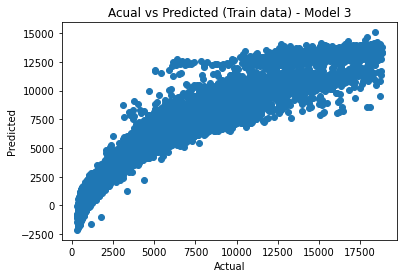

In [73]:
# Actual vs predicted on train
y_train_pred3 = ridge.predict(X_train)
plt.scatter(y_train, y_train_pred3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Acual vs Predicted (Train data) - Model 3')
plt.show()

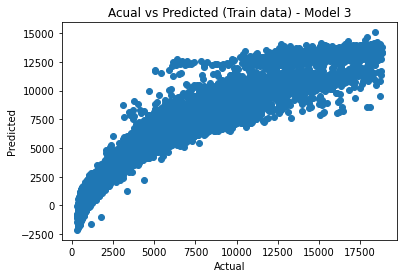

In [74]:
# Actual vs predicted on train
y_train_pred3 = ridge.predict(X_train)
plt.scatter(y_train, y_train_pred3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Acual vs Predicted (Train data) - Model 3')
plt.show()

-----

# Model comparison

In [75]:
# Model comparison
model_comp = pd.DataFrame({
    "R-Squared": [r_sqrd1, r_sqrd2, r_sqrd3],
    "RMSE (Train data)": [rmse1_train, rmse2_train, rmse3_train],
    "RMSE (Test data)": [rmse1_test, rmse2_test, rmse3_test]
}, index=["Model 1","Model 2", "Model 3"])
model_comp

,R-Squared,RMSE (Train data),RMSE (Test data)
Model 1,0.916797,1159.849864,1150.906593
Model 2,0.906771,1227.743576,1216.189305
Model 3,0.900163,1270.506244,1258.705122


In [76]:
# Coefficient comparison
coef_comp = pd.DataFrame({
    "Model 1": linear_reg1.params,
})
coef_comp = coef_comp.join(pd.DataFrame(linear_reg2.params, columns=["Model 2"]))
coef_comp = coef_comp.join(pd.DataFrame({
    "Model 3" : [ridge.intercept_[0], ridge.coef_[0][0], ridge.coef_[0][1], ridge.coef_[0][2], ridge.coef_[0][3]]
}, index=['Intercept', 'carat', 'cut_code', 'color_code', 'clarity_code']))
coef_comp.T

,Intercept,carat,cut_code,color_code,clarity_code,depth,table,x,y,z
Model 1,1386.430438,13811.506266,141.775523,328.880503,477.178343,-12.216172,-21.71003,-2565.49139,1592.704439,-1619.004643
Model 2,-8540.301302,9106.500966,166.638982,320.138172,526.985397,NaN,NaN,NaN,NaN,NaN
Model 3,-7028.980826,8305.138332,140.524598,254.332523,447.151899,NaN,NaN,NaN,NaN,NaN


-----

# Business Insights

In [77]:
print('Price = {}*\033[1mCarat\033[0m + {}*\033[1mCut\033[0m + {}*\033[1mColor\033[0m + {}*\033[1mClarity\033[0m + ({})'.format(round(ridge.coef_[0][0],2), round(ridge.coef_[0][1],2), round(ridge.coef_[0][2],2), round(ridge.coef_[0][3],2), ridge.intercept_[0]))

Price = 8305.14*Carat + 140.52*Cut + 254.33*Color + 447.15*Clarity + (-7028.98082609241)


/Users/nihalt/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='carat', ylabel='price'>

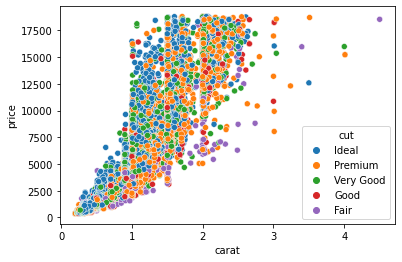

In [78]:
# Carat vs Price with cut hued
sns.scatterplot(df_zirconia["carat"], df_zirconia["price"], hue=df_zirconia['cut'], hue_order=['Ideal','Premium','Very Good','Good','Fair'], )

/Users/nihalt/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='carat', ylabel='price'>

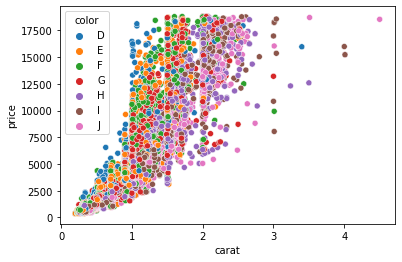

In [79]:
# Carat vs Price with color hued
sns.scatterplot(df_zirconia["carat"], df_zirconia["price"], hue=df_zirconia['color'], hue_order=['D','E','F','G','H','I','J'])

/Users/nihalt/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='carat', ylabel='price'>

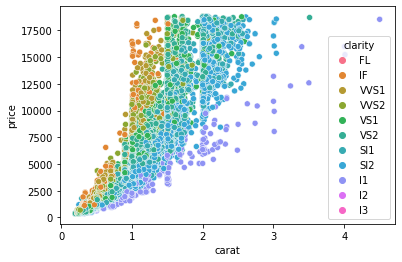

In [80]:
# Carat vs Price with clarity hued
sns.scatterplot(df_zirconia["carat"], df_zirconia["price"], hue=df_zirconia['clarity'], hue_order=['FL', 'IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1', 'I2', 'I3'])

-------
Business Insights
The variables that we will be using for predicting the price are:
1.	Carat
2.	Cut
3.	Color
4.	Clarity

The relationship between price and the variable are as follows:
Price = 8305.14*Carat + 140.52*Cut + 254.33*Color + 447.15*Clarity + (-7028.98082609241)

Amongst the 4 variables we can say that Carat contributes to the price majorly. Clarity and Color also play a fairly important role in determining the price.

From the cost function we can say 
- 8,305/carat
- 140/cut
- 254/color
- 447/clarity

For a unit increase in carat the cost of the diamond increases by 8,305. 
  

 
As the quality of colour, cut and clarity increases, the price also increases. Carat proves to be a very strong predictor of the price.

Similar to diamond the qualities of zirconia are defined mainly by the 4C’s i.e. Carat, Colour, Cut and Clarity. Other characters are basis of these variables.

Recommendations:
-	Customers prefer to split their money into the 4C’s. Though carat defines the resale value of the gem. There is huge clustering in the lower carats. The lower carats have higher quality of colour and cut. This shows that the customers want to purchase zirconia, more for the purpose of ornamentation and not as an investment.
-	As the number of carats increases the quality of zirconia cut, colour and clarity decreases. The clustering in this space is very sparse.
-	When purchasing zirconia from the vendor it is advised to focus more on the combination of good clarity and a considerable carat value  that falls within the range of  5000. The ratio money spent on carat to clarity should approximately 18:1.


# --------------------------------------------------------------------------------------------